#### Yu Han June 2022

Exploratory analysis on Neurons 1. PCA performed on 20x feature select profile data to look at clustering between control and deletion.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.io as pio
# Set to "svg" or "png" for static plots or "notebook_connected" for interactive plots
pio.renderers.default = "png" 

In [2]:
#read profile data of two plates 
df_p72=pd.read_csv('../2019_05_28_Neuronal_Cell_Painting/profiles/2022_03_03_NCP_NEURONS_2_20x/BR00132672/BR00132672_normalized_feature_select_batch.csv.gz')
df_p73=pd.read_csv('../2019_05_28_Neuronal_Cell_Painting/profiles/2022_03_03_NCP_NEURONS_2_20x/BR00132673/BR00132673_normalized_feature_select_batch.csv.gz')
df_neuron=pd.concat([df_p72,df_p73])
df_neuron.head(2)

,Metadata_plate_map_name,Metadata_EXPERIMENT_NAME,Metadata_DENSITY,Metadata_LINE_ID,Metadata_GENOTYPE,Metadata_Plate,Metadata_Well,Metadata_Site_Count,Metadata_Object_Count,Cells_AreaShape_Compactness,...,Nuclei_Texture_InverseDifferenceMoment_AGP_20_00,Nuclei_Texture_InverseDifferenceMoment_AGP_5_02,Nuclei_Texture_InverseDifferenceMoment_Brightfield_20_01,Nuclei_Texture_InverseDifferenceMoment_DNA_20_03,Nuclei_Texture_InverseDifferenceMoment_Mito_20_02,Nuclei_Texture_InverseDifferenceMoment_RNA_20_01,Nuclei_Texture_InverseDifferenceMoment_RNA_5_01,Nuclei_Texture_SumAverage_AGP_20_03,Nuclei_Texture_SumAverage_ER_20_02,Nuclei_Texture_SumVariance_Brightfield_20_00
0,NCP_2022_03_03_METADATA,2022_03_03_NCP_NEURONS_2,3500,1,DELETION,BR00132672,A01,3,144,-0.17229,...,-0.065279,1.0098,-1.32230,0.083103,0.41479,0.29334,1.2459,-0.54579,-0.98414,2.7363
1,NCP_2022_03_03_METADATA,2022_03_03_NCP_NEURONS_2,3500,1,DELETION,BR00132672,A02,3,83,-0.33451,...,0.596690,1.5056,-0.60581,0.862090,0.25006,1.02780,2.3084,-0.82466,-1.75760,-0.3397


In [3]:
#read profile data of two plates 
df_p72_aug=pd.read_csv('../2019_05_28_Neuronal_Cell_Painting/profiles/2022_03_03_NCP_NEURONS_2_20x/BR00132672/BR00132672_augmented.csv.gz')
df_p73_aug=pd.read_csv('../2019_05_28_Neuronal_Cell_Painting/profiles/2022_03_03_NCP_NEURONS_2_20x/BR00132673/BR00132673_augmented.csv.gz')
df_neuron_aug=pd.concat([df_p72_aug,df_p73_aug])
df_neuron_aug.head(2)

,Metadata_plate_map_name,Metadata_EXPERIMENT_NAME,Metadata_DENSITY,Metadata_LINE_ID,Metadata_GENOTYPE,Metadata_Plate,Metadata_Well,Metadata_Site_Count,Metadata_Object_Count,Cells_AreaShape_Area,...,Nuclei_Texture_Variance_RNA_10_02,Nuclei_Texture_Variance_RNA_10_03,Nuclei_Texture_Variance_RNA_20_00,Nuclei_Texture_Variance_RNA_20_01,Nuclei_Texture_Variance_RNA_20_02,Nuclei_Texture_Variance_RNA_20_03,Nuclei_Texture_Variance_RNA_5_00,Nuclei_Texture_Variance_RNA_5_01,Nuclei_Texture_Variance_RNA_5_02,Nuclei_Texture_Variance_RNA_5_03
0,NCP_2022_03_03_METADATA,2022_03_03_NCP_NEURONS_2,3500,1,DELETION,BR00132672,A01,3,144,7894.7,...,10.6450,10.2680,8.3504,8.6303,8.7529,8.1098,10.8360,10.6960,10.9850,10.6530
1,NCP_2022_03_03_METADATA,2022_03_03_NCP_NEURONS_2,3500,1,DELETION,BR00132672,A02,3,83,8693.7,...,7.9124,7.9807,6.6921,6.4055,7.1921,8.0110,8.3138,8.1928,8.3267,8.0722


In [4]:
#augmented file with features that exist in the normalized feature selected file
df=df_neuron_aug[df_neuron.columns.intersection(df_neuron_aug.columns)]

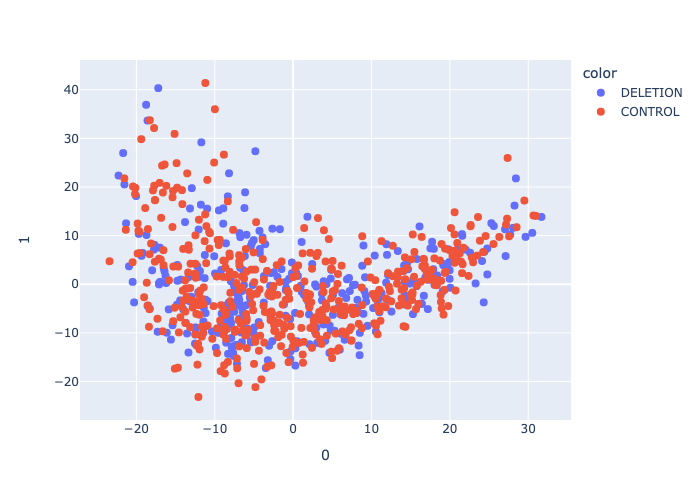

In [5]:
X = StandardScaler().fit_transform(df.iloc[:,9:]) 
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['Metadata_GENOTYPE'])
fig.update_traces(marker_size=8)
fig.show()